# La loi de Pareto et la fortune des milliardiaires
## MACS3
### ELJAMALI Sanaa & DALI Wiam


## Description du projet

Les consignes de ce projet sont les suivants.

* Vous devrez rédiger un script Python pour réaliser un calcul. 
* A l'aide de ce script, vous devez afficher les résultats du calcul. 
* Vous commenterez vos résultats numériques tant sur le plan de la cohérence avec la méthode mathématique que sur le plan de la cohérence avec le modèle physique.
* Vous présenterez vos résultats sous la forme d'un Notebook Jupyter.
* Vous travaillerez en binômes.

## Introduction

L'objectif principal de ce projet est d'explorer les difficultés pratiques qui apparaissent lorsqu'on cherche à estimer les paramètres d'une loi adaptée à un échantillon avec OpenTURNS, c'est à dire l'étape B de la méthodologie.

La loi de Pareto est une distribution originairement créée pour décrire la répartition des richesses dans une société. On peut également utiliser la loi de Pareto pour modéliser certains évènements extrêmes en hydrologie, tels que le maximum annuel de cumul de pluie sur une journée ou bien le débit d'une rivière. C'est ainsi que la loi de Pareto peut être utilisée pour modéliser une variable d'entrée d'un code de calcul d'écoulement fluvial comme TELEMAC par exemple.

Dans ce projet, nous proposons d'utiliser un échantillon de fortunes de milliardaires établi en 2014 par le magasine Forbes. Nous analyserons cet échantillon avec OpenTURNS.

## Données

On considère un échantillon de taille 1653 contenant la fortune en milliards de dollards des personnes les plus riches du monde. Cet échantillon est constitué de données issues du magasine Forbes pour l'année 2014. La fortune minimale pour faire partie de cette liste est de 1 milliard de dollards. La fortune maximale est de 76 milliards de dollards. 

Cet échantillon est stocké dans le fichier "billionaires-2014.csv".

## Description mathématique

Soit $x_m>0$ un paramètre d'échelle et $\alpha>0$ un paramètre de forme.
La variable $X$ suit loi de Pareto si :
$$
P(X>x) = 
\left\{
\begin{array}{ll}
\left(\frac{x_m}{x}\right)^\alpha \quad &\textrm{ si } \quad x\geq x_m, \\
1 \quad &\textrm{ sinon.}
\end{array}
\right.
$$
pour tout $x\in\mathbb{R}$.

Par conséquent, la fonction de répartition de $X$ est :
$$
F(x) = 
\left\{
\begin{array}{ll}
1 - \left(\frac{x_m}{x}\right)^\alpha \quad &\textrm{ si } x\geq x_m, \\
0 \quad &\textrm{ sinon.}
\end{array}
\right.
$$
pour tout $x\in\mathbb{R}$.

Cela conduit à la densité de probabilité :
$$
f(x) =  \frac{\alpha x_m^\alpha}{x^{\alpha+1}}
$$
pour tout $x\geq x_m$ et $f(x)=0$ sinon. 
Par conséquent, le logarithme de la densité est :
$$
\log(f(x)) =  \log(\alpha) + \alpha \log(x_m) - (\alpha+1)\log(x)
$$
pour tout $x\geq x_m$ et $f(x)=0$ sinon. 

## Loi de Pareto généralisée

On dit que $X$ suit la loi de Pareto généralisée si sa fonction de répartition est 
$$
F(x) = 
\begin{cases}
1 - \left(1+ \xi \frac{x-u}{\sigma}\right)^{-1/\xi} & \text{si }\xi \neq 0, \\
1 - \exp\left(-\frac{x-u}{\sigma}\right) & \text{si }\xi = 0.
\end{cases}
$$
pour tout $x\geq 0$, où $\xi\in\mathbb{R}$ est un paramètre de forme, $\sigma>0$ est un paramètre d'échelle et $u$ est un paramètre de position.

Si $\xi>0$, alors la loi de Pareto généralisée est équivalente à la loi de Pareto, avec 
$$
x_m = \frac{\sigma}{\xi}, \qquad \alpha = \frac{1}{\xi}.
$$

## Maximum de vraisemblance

Supposons que $\{x_1,...,x_n\}$ est un échantillon i.i.d. de la loi de Pareto de paramètres $x_m$ et $\alpha$. 
Pour estimer le vecteur de paramètres $\theta=(x_m,\alpha)$, nous proposons d'utiliser la méthode du maximum de vraisemblance.

Alors, la vraisemblance est égale à 
$$
L(\theta|x) 
= \alpha^n x_m^{n\alpha} \prod_{i=1}^n \frac{1}{x_i^{\alpha+1}}.
$$

Par conséquent, la log-vraisemblance est :
$$
\ell(\theta|x) 
= n \log(\alpha) + n\alpha \log(x_m) - (\alpha+1) \sum_{i=1}^n \log\left(x_i\right).
$$

On observe que la log-vraisemblance est strictement croissante en fonction de $x_m$. Par conséquent, nous souhaitons utiliser la plus grande valeur possible de $x_m$. 
Or par définition de la loi de Pareto, on a :
$$
x_m \leq x_i
$$
pour $i=1,...,n$. 
Par conséquent, la valeur de $x_m$ qui maximise la vraisemblance est 
$$
\hat{x}_m = \min_{i=1,...,n} x_i.
$$

La dérivée partielle de la log-vraisemblance par rapport à $\alpha$ est :
$$
\frac{\partial \ell}{\partial \alpha}(\theta)
= \frac{n}{\alpha} + n\log(x_m) - \sum_{i=1}^n \log\left(x_i\right).
$$
La dérivée partielle est nulle si :
$$
\frac{n}{\alpha} 
= \sum_{i=1}^n \log\left(\frac{x_i}{x_m}\right).
$$

Par conséquent, l'estimateur du maximum de vraisemblance est :
$$
\hat{\alpha} = \frac{n}{\sum_{i=1}^n \log\left(\frac{x_i}{\hat{x}_m}\right)}.
$$

## Méthode des moments

Supposons que la variable aléatoire $X$ suit la loi de Pareto de paramètres $x_m$ et $\alpha$.

Alors l'espérance de $X$ est égale à :
$$
E(X) = \frac{\alpha}{\alpha-1} x_m.
$$
On peut inverser l'équation précédente et obtenir $\alpha$ en fonction de $E(X)$ et $x_m$ :
$$
\alpha  = \frac{E(X)}{E(X)- x_m}.
$$

Pour estimer $x_m$, nous proposons d'utiliser l'estimateur du maximum de vraisemblance :
$$
\hat{x}_m = \min_{i=1,...,n} x_i.
$$

Pour estimer $\alpha$, nous proposons d'utiliser la méthode des moments.
Soit $\bar{x}$ la moyenne empirique :
$$
\bar{x} = \sum_{i=1}^n x_i.
$$
L'estimateur de $\alpha$ est 
$$
\hat{\alpha} = \frac{\bar{x}}{\bar{x}- x_m}.
$$

## Méthode des moindres carrés

Pour tout $x\geq x_m$, le logarithme de la probabilité d'excéder le seuil $x$ est :
$$
\log(P(X>x)) = \alpha \log(x_m) - \alpha \log(x).
$$

Soient $\beta_0,\beta_1\in\mathbb{R}$ définis par :
$$
\beta_0 = \alpha \log(x_m), \qquad \beta_1 = -\alpha.
$$
Pour tout $x\geq x_m$, on a :
$$
\log(P(X>x)) = \beta_0 + \beta_1 \log(x).
$$

En d'autres termes, dans le plan $(\log(x),\log(P(X>x)))$, la relation est linéaire ; l'ordonnée à l'origine est égale à $\alpha \log(x_m)$ et la pente est négative et égale à $-\alpha$.
On peut inverser les relations, ce qui implique : 
$$
x_m = \exp\left(-\frac{\beta_0}{\beta_1}\right), \qquad \alpha = -\beta_1.
$$
Cette propriété de la loi de Pareto peut être exploitée pour estimer les paramètres par la méthode des moindres carrés linéaires.

Supposons que $\{x_1,...,x_n\}$ est un échantillon i.i.d. de la loi de Pareto de paramètres $x_m$ et $\alpha$. 

Soit $\hat{S}_n$ la fonction de survie empirique définie par :
$$
\hat{S}_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}_{x_i>x}
$$
pour tout $x\geq x_m$.
Soit 
$$
y_i = \log(x_i), \qquad z_i = \log\left(\hat{S}_n(x_i)\right)
$$
pour $i=1,...,n$.

Alors le modèle est 
$$
z_i = \beta_0 + \beta_1 y_i + \epsilon_i,
$$
pour $i=1,...,n$ où $\epsilon_i$ est une variable aléatoire.
Soit $Y\in\mathbb{R}^{n\times 2}$ la matrice de conception définie par :
$$
Y = \begin{pmatrix}
1 & y_1 \\
2 & y_2 \\
\vdots & \vdots \\
1 & y_n
\end{pmatrix}.
$$
Le modèle peut s'écrire sous la forme matricielle :
$$
z = Y \beta + \epsilon,
$$
où $\beta=(\beta_0,\beta_1)^T\in\mathbb{R}^2$ est le vecteur des paramètres, 
$z\in\mathbb{R}^n$ est le vecteur des logarithmes des observations 
et $\epsilon\in\mathbb{R}^n$ est un vecteur aléatoire. 

Notons $\hat{\beta}$ l'estimation de $\beta$ par la méthode des moindres carrés linéaires :
$$
\hat{\beta} = argmin_{\beta\in\mathbb{R}^2} \|z - Y\beta\|_2^2.
$$

Par conséquent, l'estimation des paramètres du modèle de Pareto par la méthode des moindres carrés linéaires est :
$$
\hat{x}_m = \exp\left(-\frac{\hat{\beta}_0}{\hat{\beta}_1}\right), \qquad \hat{\alpha} = -\hat{\beta}_1.
$$



## Références

* https://en.wikipedia.org/wiki/Pareto_distribution
* https://en.wikipedia.org/wiki/Generalized_Pareto_distribution
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.GeneralizedPareto.html#openturns.GeneralizedPareto
* The Forbes 400, the Pareto power-law and efficient markets, O.S. Klass, O. Biham, M. Levy, O. Malcai, and S. Solomon, Eur. Phys. J. B 55, 143–147 (2007)
* Inégalités et pauvreté, de Pareto à Galbraith, Débats et controverses. Arnaud DIEMER. Université Blaise Pascal, TRIANGLE, CERDI
* LA LOI DE PARETO: UNE LOI SUR L'INÉGALITÉ OU SUR LA PAUVRETÉ? RÉPONSES THÉORIQUE ET EMPIRIQUE. Taladidia THIOMBIANO. Décembre 1999
* Topics in Inequality, Lecture 8 Pareto Income and Wealth Distributions. Daron Acemoglu. MIT. April 1, 2015.
* The Pareto Principle. Rosie Dunford, Quanrong Su, Ekraj Tamang and Abigail Wintour. The Plymouth Student Scientist, 2014, 7, (1), 140–148.
* The Distribution of Wealth and Fiscal Policy in Economies With Finitely Lived Agents. Jess Benhabib, Alberto Bisin, Shenghao Zhu. Econometrica, Vol. 79, No. 1 (January, 2011), 123–157
* Source : https://think.cs.vt.edu/corgis/csv/billionaires/billionaires.html

## Questions

## Question 1 : lecture des données

* Créer un `Sample` contenant les données du fichier "billionaires-2014.csv".
* Dessiner l'histogramme de la répartition des fortunes avec la classe `HistogramFactory`. 
* Commenter cet histogramme.

In [2]:
import openturns as ot
import numpy as np
import math as m

In [3]:
sample = ot.Sample.ImportFromCSVFile('billionaires-2014.csv')
n = sample.getSize() #Dimension de l'échantillon
print("Sample size=%d " % (n))

Sample size=1653 


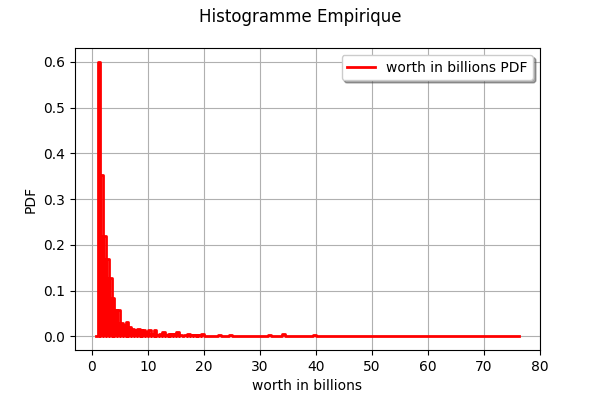

In [4]:
hist = ot.HistogramFactory().build(sample)
hist = hist.drawPDF()
hist.setTitle('Histogramme Empirique')
hist

_L'histogramme obtenu admet un fort effectif pour les valeurs proches de 0, et des effectifs très faibles pour les grandes valeurs._

## Question 2 : loi de Pareto généralisée

* Utiliser la classe `GeneralizedParetoFactory` pour estimer les paramètres de la loi de Pareto généralisée, en utilisant la méthode `buildAsGeneralizedPareto` sur l'échantillon `sample`.
* Afficher les valeurs des paramètres $\sigma$, $\xi$ et $u$ obtenus par la méthode. 
* Sur un même graphique, dessiner l'histogramme empirique des observations (avec `HistogramFactory`) et superposer la densité de probabilité de la loi de Pareto généralisée (avec la méthode `drawPDF`) dont les paramètres ont étés ajustés sur l'échantillon. Commenter votre graphique.

La méthode statique `VisualTest_DrawQQplot` permet de dessiner un QQ-Plot associé à un échantillon et une distribution. Dans le but de corriger les paramètres par défaut, nous avons développé la fonction `DrawQQPlotWithBullet` qui permet d'afficher des points plus grands pour améliorer la visibilité.

In [5]:
def DrawQQPlotWithBullet(sample,distribution):
    graph = ot.VisualTest_DrawQQplot(sample,distribution)
    cloud = graph.getDrawable(1)
    cloud.setPointStyle("bullet")
    graph.setDrawable(cloud,1)
    return graph

In [6]:
P = ot.GeneralizedParetoFactory().buildAsGeneralizedPareto(sample)
Sigma,Xi,U = P.getParameter()
print("Sigma =",Sigma, "Xi =", Xi , "U =", U)

Sigma = 1.4108955503940774 Xi = 0.5143655397986744 U = 0.9993957703927493


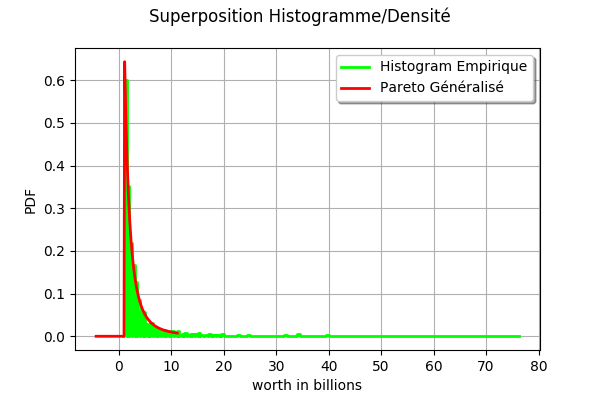

In [7]:
graph = hist
graph.setLegends(["Histogram Empirique"])
graph.setColors(["green"])
p = P.drawPDF()
p.setLegends(["Pareto Généralisé"])
graph.add(p)
graph.setTitle("Superposition Histogramme/Densité")
graph

_On remarque que le mode de la loi de Pareto Généralisé est plus grand que le mode de l'histogramme empirique._

* Dessiner le QQ-Plot avec la fonction `DrawQQPlotWithBullet` pour comparer les quantiles de l'échantillon et les quantiles de la loi de Pareto généralisée dont les paramètres ont étés ajustés sur l'échantillon. Commenter votre graphique.
* Utiliser les équations permettant d'obtenir la valeur des paramètres $x_m$ et $\alpha$ équivalents pour la loi de Pareto. Afficher les valeurs de $x_m$ et $\alpha$.  

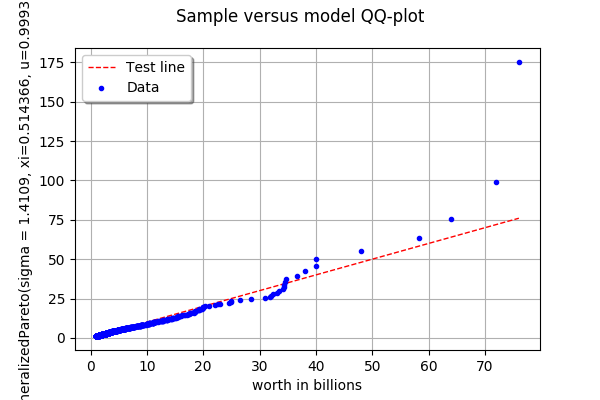

In [8]:
DrawQQPlotWithBullet(sample,P)

_L'ajustement n'est pas acceptable car il y a un écart très important pour les grandes valeurs._

In [9]:
alpha = 1/Xi
xm = Sigma*alpha
print("xm =",xm,"alpha =",alpha)

xm = 2.7429822591659425 alpha = 1.9441426818589085


## Question 3 : définition de la distribution de Pareto

* Définir la classe `Pareto` implémentant la distribution de Pareto, par dérivation de la classe `PythonDistribution`. Vous implémenterez les méthodes suivantes :
  * `__init__` : les valeurs par défaut des paramètres sont $x_m=1$ et $\alpha=1$.
  * `computeCDF`
  * `getRange` : vous retournerez l'intervalle `ot.Interval(self.xm, 1.e10)`
  * `computeComplementaryCDF`
  * `computePDF`
  * `computeLogPDF`
* En utilisant la méthode `drawPDF` dessiner la densité de probabilité de la loi de Pareto avec $x_m=1$ et $\alpha=1,2,3$.
* En utilisant la méthode `drawCDF` dessiner la fonction de répartition de la loi de Pareto avec $x_m=1$ et $\alpha=1,2,3$.
* Comment évolue la distribution lorsque $\alpha$ augmente ?

In [10]:
class Pareto(ot.PythonDistribution):
    def __init__(self, xm=1 , alpha=1):
        #ot.PythonDistribution.__init__(self,1)
        super(Pareto,self).__init__(1)
        self.xm = xm
        self.alpha = alpha
        self.factor = xm**alpha
# La fonction de répartition
    def computeCDF(self,X):
        x = X[0]
        if (x >= self.xm):
                F = 1-self.factor/x**self.alpha
        else:
                F = 0.0
        return F
    def getRange(self):
        return (ot.Interval(self.xm,1.e10))
# La densité
    def computePDF(self,X):
        x = X[0]
        if (x >= self.xm):
                f = self.alpha*self.factor/(x**(self.alpha+1))                                    
        else:
             f = 0.0
        return f
# Log de la densité
    def computeLogPDF(self,X):
        x = X[0]
        if (x >= self.xm):
                Logf = np.log(self.alpha)+self.alpha*np.log(self.xm)-(self.alpha+1)*np.log(x)
        else:
            Logf = 0.0
        return Logf
# Affichage xm
    def getXm(self):
        f = self.xm
        return f
    

In [11]:
import openturns.viewer

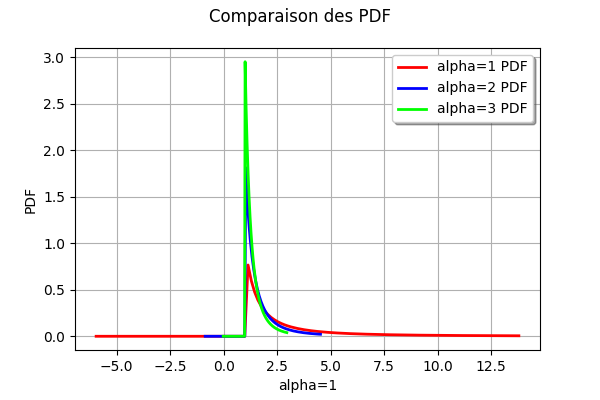

In [12]:

U1 = ot.Distribution(Pareto(1.0,1.0))
U1.setDescription(["alpha=1"])
graph = U1.drawPDF()
U2 = ot.Distribution(Pareto(1.0,2.0))
U2.setDescription(["alpha=2"])
g2 = U2.drawPDF()
g2.setColors(["blue"])
graph.add(g2)
U3 = ot.Distribution(Pareto(1.0,3.0))
U3.setDescription(["alpha=3"])
g3 = U3.drawPDF()
g3.setColors(["green"])
graph.add(g3)
graph.setTitle("Comparaison des PDF")
graph

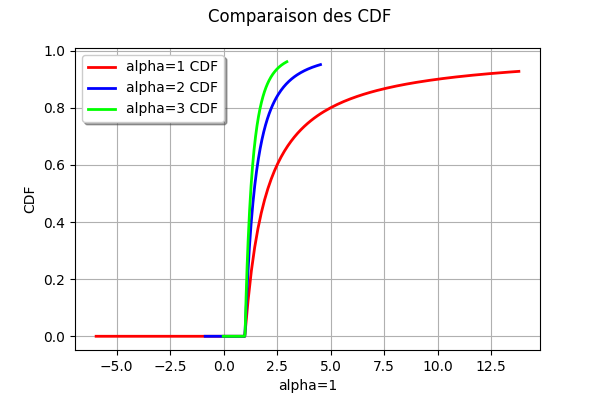

In [13]:
U1 = ot.Distribution(Pareto(1.0,1.0))
U1.setDescription(["alpha=1"])
graph = U1.drawCDF()
U2 = ot.Distribution(Pareto(1.0,2.0))
U2.setDescription(["alpha=2"])
g2 = U2.drawCDF()
g2.setColors(["blue"])
graph.add(g2)
U3 = ot.Distribution(Pareto(1.0,3.0))
U3.setDescription(["alpha=3"])
g3 = U3.drawCDF()
g3.setColors(["green"])
graph.add(g3)
graph.setTitle("Comparaison des CDF")
graph

_Lorsque $\alpha$ augmente, on remarque que la distribution est plus étroite et que son mode est plus grand._ 

## Question 4 : estimation des paramètres de la loi de Pareto par la méthode du maximum de vraisemblance

* Utiliser la méthode du maximum de vraisemblance pour estimer les paramètres $x_m$ et $\alpha$ pour l'échantillon.
* Afficher les valeurs des paramètres $x_m$ et $\alpha$ obtenus par la méthode. 
* Sur un même graphique, dessiner l'histogramme empirique des observations et superposer la densité de probabilité de la loi de Pareto  dont les paramètres ont étés ajustés sur l'échantillon. Vous utiliserez la classe `Pareto` définie dans la question précédente. Commenter votre graphique.
* Dessiner le QQ-Plot pour comparer les quantiles de l'échantillon et les quantiles de la loi de Pareto dont les paramètres ont étés ajustés sur l'échantillon. Commenter votre graphique.

## Maximum de Vraisemblance

 En utilisant les formules $$\hat{x}_m = \min_{i=1,...,n} x_i.$$ et $$
\hat{\alpha} = \frac{n}{\sum_{i=1}^n \log\left(\frac{x_i}{\hat{x}_m}\right)}.
$$

In [14]:
xm1 = min(np.array(sample))[0]
alpha1 = n/np.sum(np.log(sample/xm1))
xm1,alpha1

(1.0, 1.0523738032676482)

En utilisant la classe `MaximumLikelihoodFactory`

_On vérifie bien que nous obtenons la même distribution._

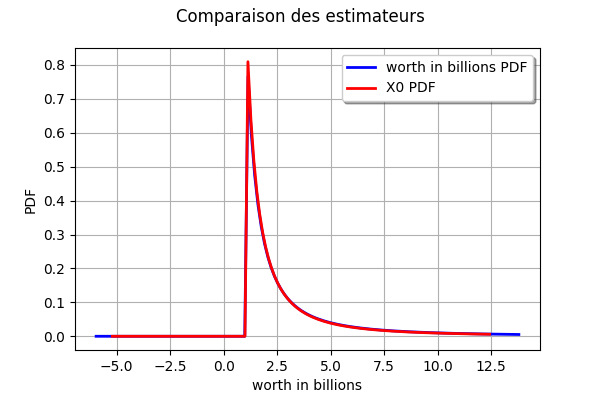

In [15]:
factory = ot.MaximumLikelihoodFactory(ot.Distribution(Pareto()))
inf_distribution = factory.build(sample)
graph = inf_distribution.drawPDF()
graph.setColors(["blue"])
graph.add((ot.Distribution(Pareto(xm1,alpha1))).drawPDF())
graph.setTitle("Comparaison des estimateurs")
graph


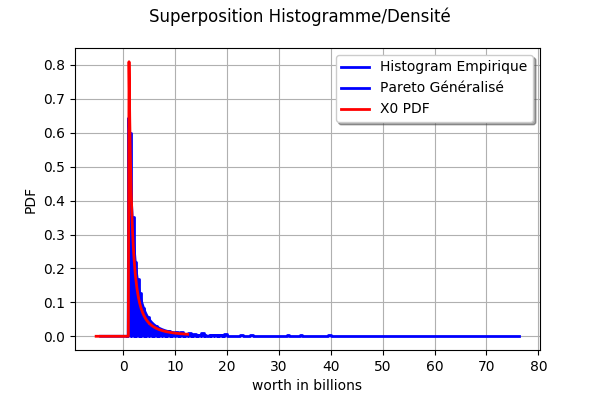

In [16]:
graph = hist
graph.setColors(["blue"])
P1 = ot.Distribution(Pareto(xm1,alpha1))
graph.add(P1.drawPDF())
graph.setTitle("Superposition Histogramme/Densité")
#p2 = P2.drawPDF()
#p2.setColors(["green"])
#graph.add(p2)
graph

_On remarque que le mode de la distribution est beaucoup plus grand que celui de l'histogramme empirique; et que les valeurs de l'histogramme sont plus grandes que la distribution pour les grandes valeurs._ 

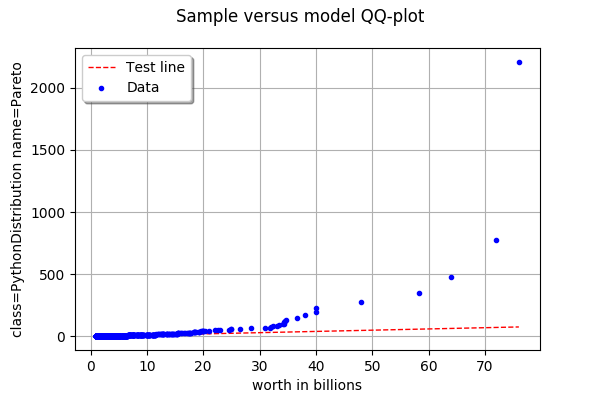

In [17]:
DrawQQPlotWithBullet(sample,P1)

L'ajustement est très mauvais, la distance entre la première bissectrice et les grandes valeurs est assez importante. 

## Question 5 : estimation des paramètres de la loi de Pareto par la méthode des moments (mixte)

* Utiliser la méthode du maximum des moments (mixte) pour estimer les paramètres $x_m$ et $\alpha$ pour l'échantillon.
* Afficher les valeurs des paramètres $x_m$ et $\alpha$ obtenus par la méthode. 
* Sur un même graphique, dessiner l'histogramme empirique des observations et superposer la densité de probabilité de la loi de Pareto  dont les paramètres ont étés ajustés sur l'échantillon. Commenter votre graphique.
* Dessiner le QQ-Plot pour comparer les quantiles de l'échantillon et les quantiles de la loi de Pareto dont les paramètres ont étés ajustés sur l'échantillon. Commenter votre graphique.

En utilisant les formules $$\hat{x}_m = \min_{i=1,...,n} x_i.$$ et  $$
\hat{\alpha} = \frac{\bar{x}}{\bar{x}- x_m}.
$$

In [18]:
mean = np.mean(sample)
alpha2 = mean/(mean - xm1)
xm1,alpha2


(1.0, 1.3442745865789145)

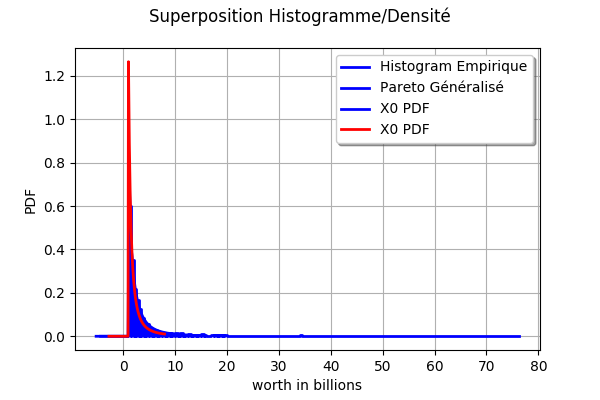

In [19]:
graph = hist
graph.setColors(["blue"])
P2 = ot.Distribution(Pareto(xm1,alpha2))
graph.add(P2.drawPDF())
graph.setTitle("Superposition Histogramme/Densité")
graph

_Le mode de la distribution ajustée est beaucoup plus grand que celui de l'histogramme._ 

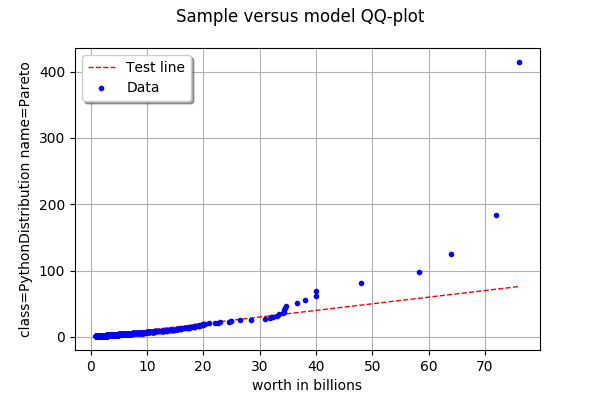

In [20]:
DrawQQPlotWithBullet(sample,P2)

_L'ajustement reste inacceptable, les valeurs empiriques s'écartent de la première bissectrice._

## Question 6 : en échelle double logarithmique

L'objectif de cette question est d'observer le graphique des observations dans le plan $(\log(x),\log(P(X>x)))$. 

Pour cette question on utilisera les fonctions suivantes.

In [21]:
def drawEmpiricalSurvivalFunction(sample, xmin, xmax, npoints):
    '''Plots the empirical survival function of a sample in Log-Log scale'''
    userdefined = ot.UserDefined(sample)
    pointNumber = sample.getSize()
    logscale = True
    graph = userdefined.drawSurvivalFunction(xmin, xmax, pointNumber, logscale)
    graph.setLogScale(ot.GraphImplementation.LOGXY)
    return graph

In [22]:
def drawSurvivalFunction(distribution, xmin, xmax, npoints):
    '''Plots the survival function of a distribution in Log-Log scale'''
    logscale = True
    graph = distribution.drawSurvivalFunction(xmin, xmax, npoints, logscale)
    graph.setLogScale(ot.GraphImplementation.LOGXY)
    return graph

* Créer un graphique en échelle double logarithmique dans lequel vous présenterez la fonction de survie empirique des observations et la fonction de survie de la loi de Pareto dont les paramètres ont étés estimé par la méthode du maximum de vraisemblance (dans la question précédente). Pour dessiner la fonction de survie empirique des observations, vous utiliserez la fonction `drawEmpiricalSurvivalFunction`. Pour dessiner la fonction de survie de la loi de Pareto, vous utiliserez la fonction `drawSurvivalFunction`. 
* Commentez votre graphique.

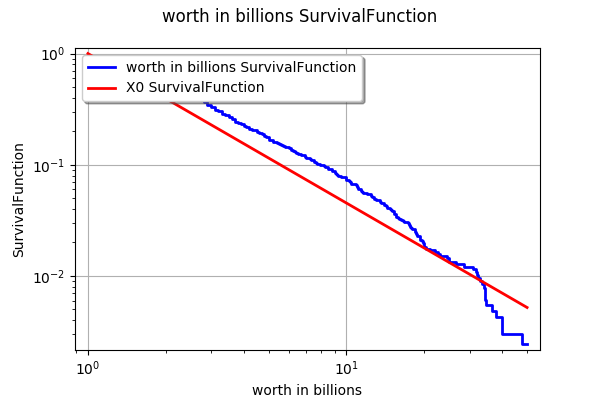

In [23]:
distribution = ot.Distribution(Pareto(xm1,alpha2))
graph = drawEmpiricalSurvivalFunction(sample, xm1, 50, 10000)
graph.setColors(["blue"])
graph.add(drawSurvivalFunction(distribution, xm1, 50, 10000))
graph

_On remarque que la fonction de survie de la densité ajustée coupe la fonction de survie empirique qui s'écarte de cette première pour les grandes valeurs._

## Question 7 : estimation des paramètres de la loi de Pareto par la méthodes des moindres carrés

Pour cette question, vous pourrez utiliser la fonction suivante qui retourne la distribution de Pareto qui s'ajuste à l'échantillon en argument. 

In [24]:
def BuildParetoLeastSquares(sample):
    '''Estimates the parameters of the Pareto distribution 
    that fits to the sample. 
    Uses least squares for the relation of the log of the empirical 
    survival function to the log of the data.'''
    log = ot.SymbolicFunction(["x"],["log(x)"])
    exp = ot.SymbolicFunction(["x"],["exp(x)"])
    #
    n = sample.getSize()
    orderedSample = ot.Sample(sample.sort())
    p = ot.Sample([(n-i-1)/float(n) for i in range(n)],1)
    # Compute the least squares inputs
    # Do not plot the last data point (which has probability 1 and survival 0), 
    # otherwise the logscale fails
    y = log(orderedSample[0:n-1])
    z = log(p[0:n-1])
    # Least squares
    llsq = ot.LinearLeastSquares(y,z)
    llsq.run()
    beta0 = llsq.getConstant()[0]
    beta1 = llsq.getLinear()[0,0]
    xm = exp([-beta0/beta1])[0]
    alpha = -beta1
    P = ot.Distribution(Pareto(xm,alpha))
    return P,xm,alpha

* Utiliser la fonction `BuildParetoLeastSquares` pour estimer les paramètres de la loi de Pareto par la méthode des moindres carrés. 
* Afficher les valeurs des paramètres $x_m$ et $\alpha$ obtenus par la méthode. 
* Créer un graphique en échelle double logarithmique dans lequel vous présenterez la fonction de survie empirique des observations et la fonction de survie de la loi de Pareto dont les paramètres ont étés estimé par la méthode du maximum de vraisemblance (dans la question précédente).  Commenter votre graphique.
* Dessiner le QQ-Plot pour comparer les quantiles de l'échantillon et les quantiles de la loi de Pareto dont les paramètres ont étés ajustés sur l'échantillon. Commenter votre graphique.

xm = 1.1705904626958887 alpha = 1.2619626059802576


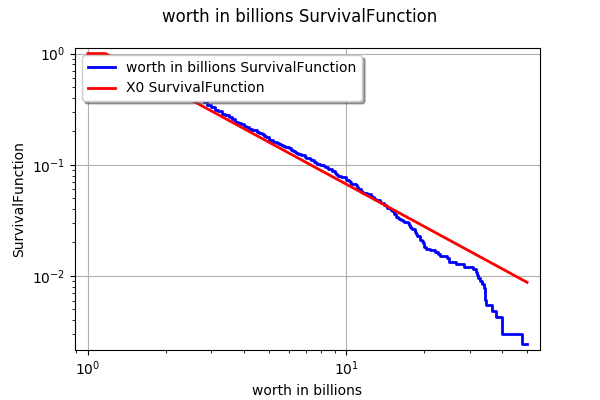

In [25]:
distribution,xm3,alpha3 = BuildParetoLeastSquares(sample)
print("xm =",xm3,"alpha =",alpha3)
graph = drawEmpiricalSurvivalFunction(sample, xm1, 50, 1000)
graph.setColors(["blue"])
graph.add(drawSurvivalFunction(distribution, xm1, 50, 1000))
graph

_On remarque que la fonction de survie de la densité est plus proche de la fonction de survie empirique que précédemment. Cependant, l'ecart est plus grand pour les valeurs élevées._ 

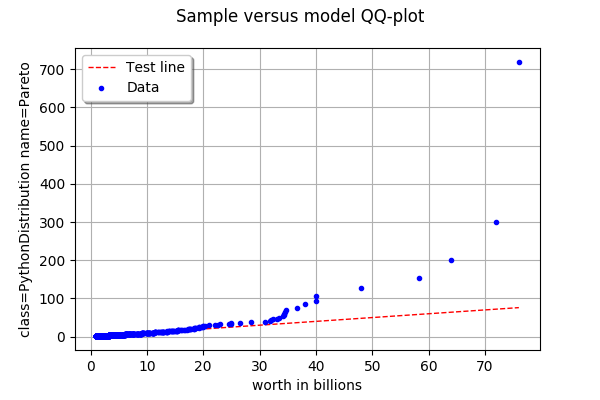

In [26]:
DrawQQPlotWithBullet(sample,distribution)

_L'ajustement reste innacceptable. Les grandes valeurs sont toujours éloignées de la première bissectrice._

## Question 8 : synthèse

* Dans une table, présentez les valeurs des paramtres $x_m$ et $\alpha$ obtenus par chacune des méthodes. 
* Commentez les différences que vous observez dans l'estimation des paramètres. Comment expliquez-vous ces différences ?
* Pouvez-vous vous prononcer sur l'adéquation de l'échantillon à la loi de Pareto ?
* Pour quels types d'études devrait-on choisir telle ou telle méthode d'estimation ?
* Comment pourrait-on aller plus loin dans cette analyse de l'ajustement de la loi de Pareto à cet échantillon ?

In [28]:
print("Méthode                    ","      xm           ","alpha\n")
print("Pareto Généralisé        ", xm, " ",alpha)
print("Maximum de Vraisemblance ",xm1,"                ",alpha1)
print("Méthode des moments      ",xm1,"                ",alpha2)
print("Moindres Carrés          ",xm3," ",alpha3)


Méthode                           xm            alpha

Pareto Généralisé         2.7429822591659425   1.9441426818589085
Maximum de Vraisemblance  1.0                  1.0523738032676482
Méthode des moments       1.0                  1.3442745865789145
Moindres Carrés           1.1705904626958887   1.2619626059802576


- _On remarque tout d'abord que nous obtenons des valeurs différentes pour les paramètres éstimés, car les méthodes d'éstimation utilisées ne donnent pas les memes estimateurs._
- _En utilisant les différentes méthodes, nous remarquons que les ajustements obtenus ne sont pas acceptables en général (il y a toujours des singularités pour les valeurs élevées)._
- _Cependant, l'ajustement peut être acceptable si on s'intéresse uniquement à une certaine plage de valeurs (faibles). En effet, en utilisant la méthode des moindres carrés, on constate que les deux courbes de survies sont très proches pour les faibles valeurs. On peut donc considérer que l'éstimation est valable pour ces valeurs. Par ailleurs, la méthode des moments permet d'obtenir des estimations pour les paramètres de moindre qualités, mais qui réduisent les erreurs globales (QQ-Plot). L'ajustement reste insatifaisant_
- _On pourrait utiliser la méthode à noyaux pour obtenir de nouvelles éstimations des paramètres. Le support de la distribution des richesses est fini, tandis que celui de la loi de Pareto est fini, ce qui peut éxpliquer les difficultés d'éstimation._